# Base distributions showcase

In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
# Use Kraskov-Stogbauer-Grassberger MI estimator to run example tests.
from mutinfo.estimators.ksg import KSG

In [3]:
from utils.plots import *

In [4]:
MI_grid = np.linspace(0.0, 10.0, 11)
n_samples = 10000
n_runs = 20

# Scikit-learn MI estimator works with 1D random variables only.
X_dimension = 2
Y_dimension = 3

In [5]:
font = {'size' : 18}
matplotlib.rc('font', **font)

## Correlated Gaussian distribution

In [6]:
from mutinfo.distributions.base import CorrelatedNormal

In [7]:
estimated_MI = []

for mutual_information in tqdm(MI_grid):
    current_run_estimates = []
    for run in range(n_runs):
        random_variable = CorrelatedNormal(mutual_information, X_dimension, Y_dimension)
        x_y = random_variable.rvs(n_samples)
    
        estimator = KSG()
        current_run_estimates.append(estimator(x_y[:,:X_dimension], x_y[:,X_dimension:]))
    
    current_run_estimates = np.array(current_run_estimates)
    mean = np.mean(current_run_estimates)
    std = np.std(current_run_estimates) / np.sqrt(n_runs)
    
    estimated_MI.append([mean, 3*std])

estimated_MI = np.array(estimated_MI)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:48<00:00,  4.45s/it]


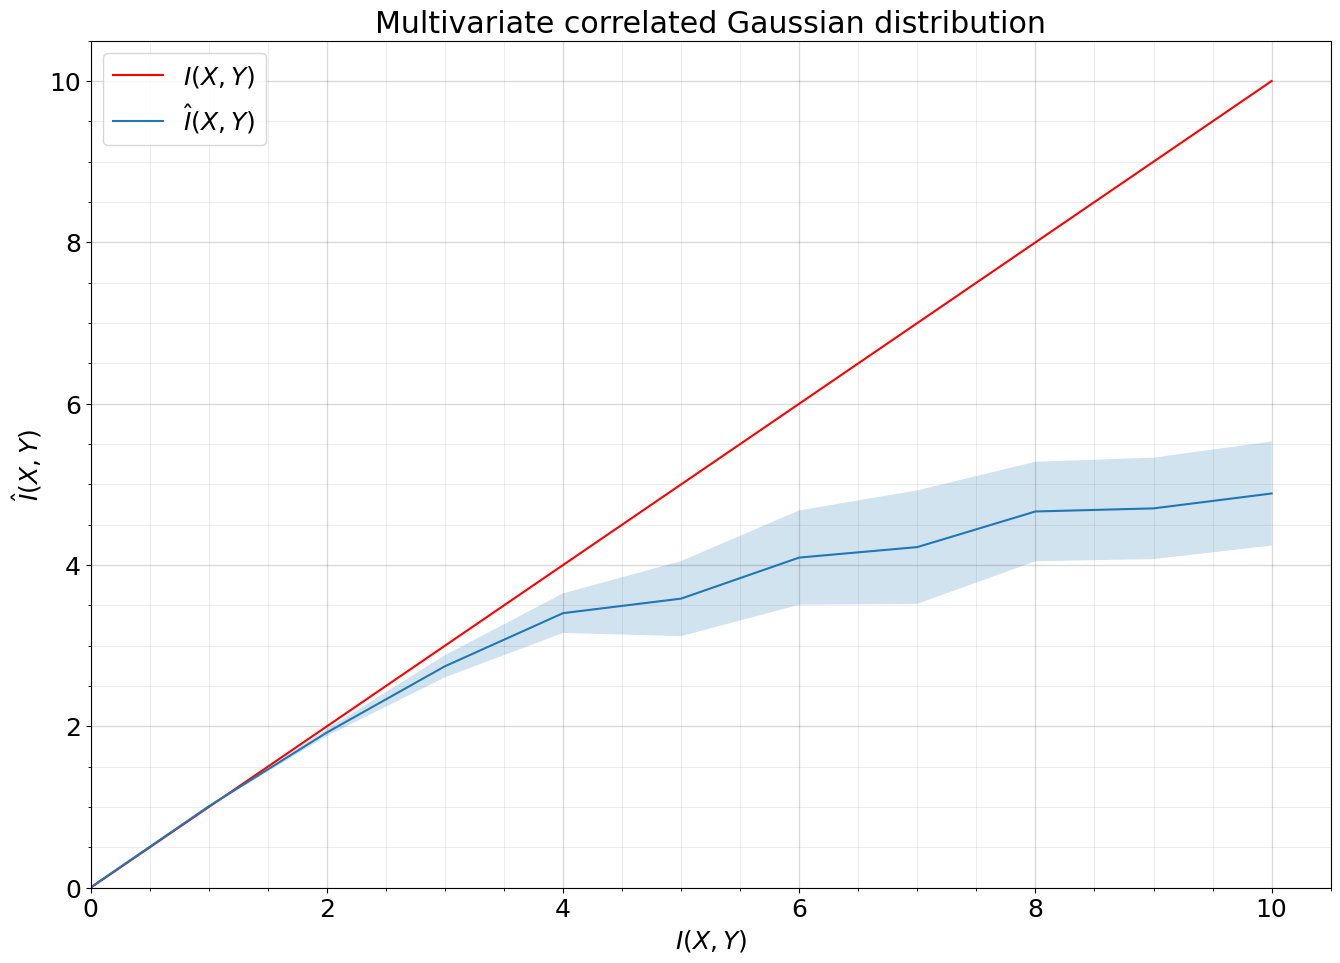

In [8]:
plot_estimated_MI(MI_grid, estimated_MI, "Multivariate correlated Gaussian distribution")